# TP1

## Ejercicio 2

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.stats import expon

In [2]:
f = []

In [3]:
for t in range(10):
    f.append(1/25)

In [4]:
for t in range(10,100):
    f.append(3/5*expon.pdf(t,loc=10,scale=15))

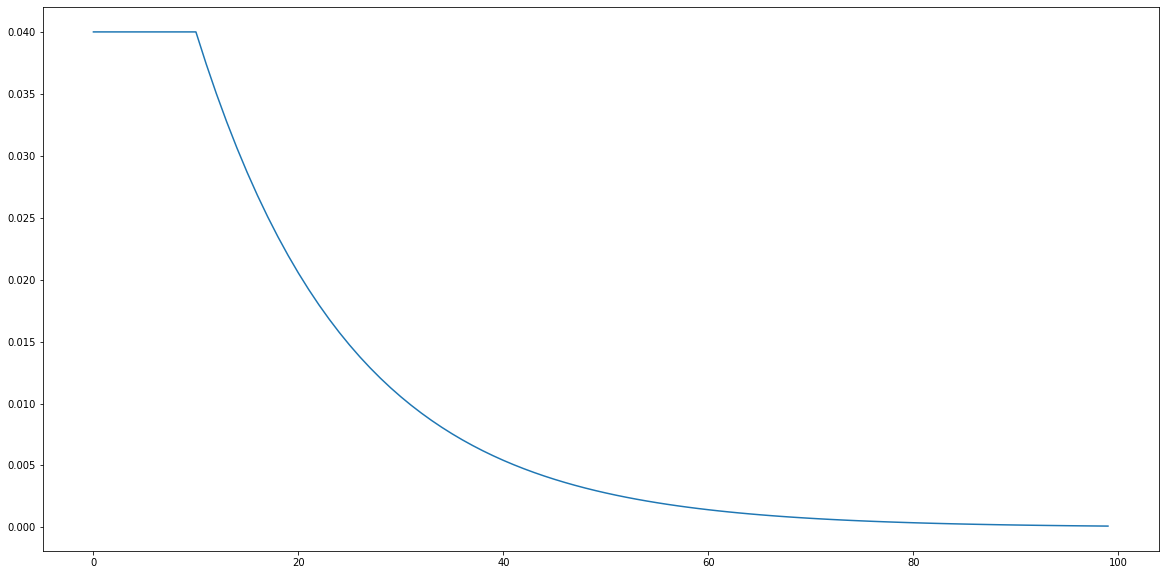

In [5]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(f)
plt.show()

In [18]:
F = []

In [19]:
for t in range(10):
    F.append(1/25*t)

In [20]:
last = F[len(F)-1]

In [21]:
for t in range(11,100):
    F.append(3/5*expon.cdf(t,loc=10,scale=15) + last)

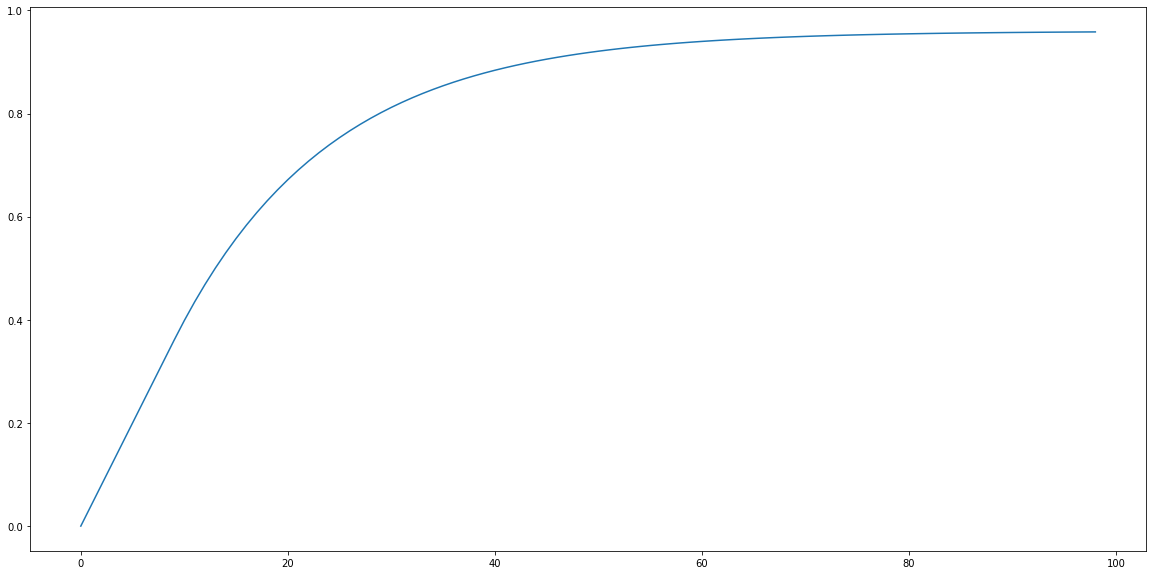

In [22]:
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(F)
plt.show()

## Ejercicio 4

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.ndimage.interpolation import rotate
import math

In [2]:
def rotate(origin, point, angle):
    """
    Rotate a point counterclockwise by a given angle around a given origin.

    The angle should be given in radians.
    """
    ox, oy = origin
    px, py = point

    qx = ox + math.cos(angle) * (px - ox) - math.sin(angle) * (py - oy)
    qy = oy + math.sin(angle) * (px - ox) + math.cos(angle) * (py - oy)
    return qx, qy

In [3]:
points = 1000

In [4]:
xs = np.random.uniform(low=0, high=1, size=(points))*5 + 7.5
ys = np.random.uniform(low=0, high=1, size=(points))*5 + 7.5

In [5]:
l = []
for i in range(points):
    l.append(rotate((10,10),(xs[i],ys[i]),math.radians(45)))

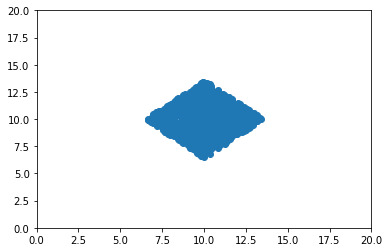

In [6]:
fig,ax = plt.subplots()
ax.scatter([x[0] for x in l],[x[1] for x in l])
ax.set_xlim((0,20))
ax.set_ylim((0,20))
plt.show()

## Ejercicio 5

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from scipy.stats import norm

In [2]:
def box_muller(u1,u2):
    z1 = np.sqrt(-2*np.log(u1))*np.cos(2*np.pi*u2)
    z2 = np.sqrt(-2*np.log(u1))*np.sin(2*np.pi*u2)
    return z1,z2

In [3]:
us = np.random.uniform(0,1,(100000,2))

In [4]:
z1 = []
z2 = []
for u1, u2 in us:
    zs = box_muller(u1,u2)
    z1.append(zs[0])    
    z2.append(zs[1])

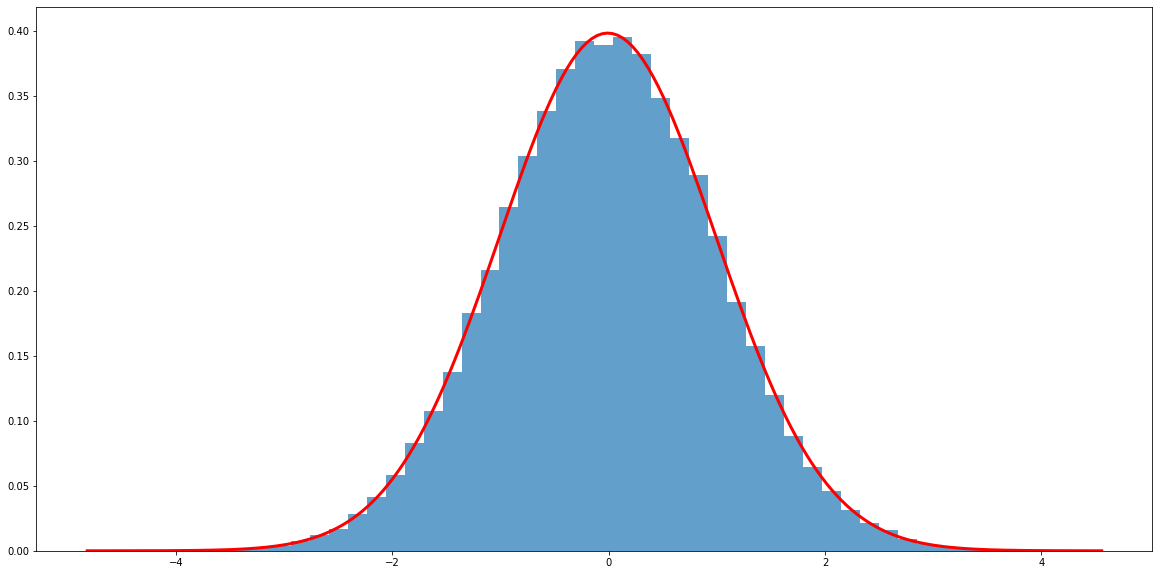

In [5]:
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(z1,fit=norm,kde=False,fit_kws={"color": "r", "lw": 3, "label": "normal"},hist_kws={"alpha": 0.7})
plt.show()

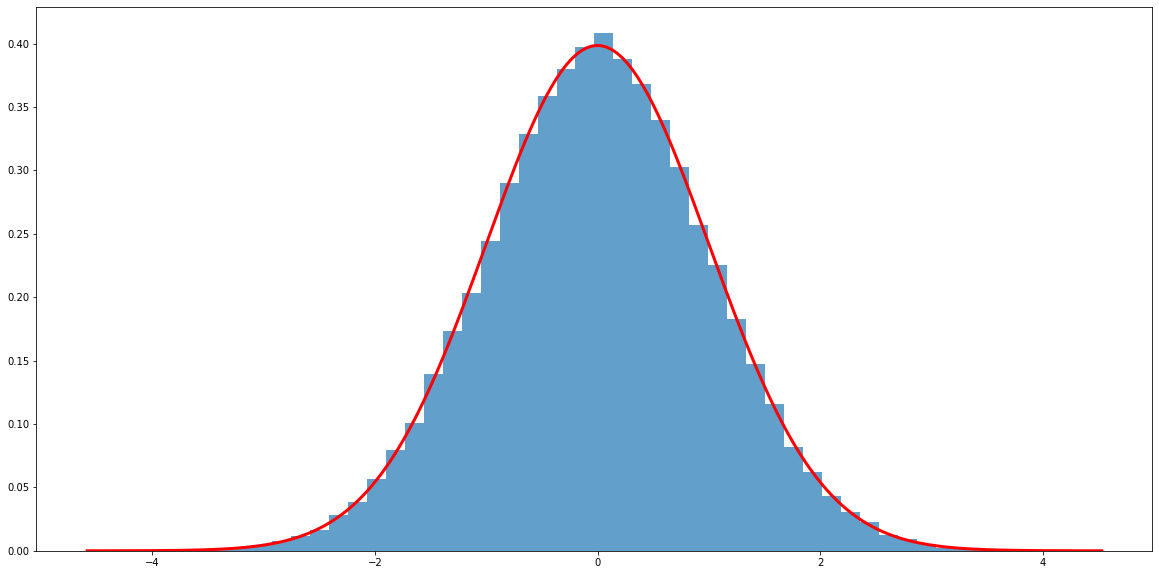

In [6]:
fig, ax = plt.subplots(figsize=(20,10))
sns.distplot(z2,fit=norm,kde=False,fit_kws={"color": "r", "lw": 3, "label": "normal"},hist_kws={"alpha": 0.7})
plt.show()

## Ejercicio 7

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [ ]:
def spectral_test_2d(lcg):
    '''
    Given a linear congruent generator lcg,
    obtain a 2D scatter plot where: for each
    point (x, y),
      - x = lcg(i)
      - y = lgc(i+1)
    '''
    
    # generate samples
    samples = 1000
    x = [lcg(i)   for i in range(samples)]
    y = [lcg(i+1) for i in range(samples)]
    
    # plot results
    fig, ax = plt.subplots(figsize=(20,10))
    sns.scatterplot(x=x, y=y)
    plt.show()

In [ ]:
from mpl_toolkits import mplot3d

def spectral_test_3d(lcg):
    '''
    Given a linear congruent generator lcg,
    obtain a 3D scatter plot where: for each
    point (x, y, z),
      - x = lcg(i)
      - y = lgc(i+1)
      - z = lcg(i+2)
    '''
    
    fig = plt.figure(figsize=(20,10))
    ax = fig.add_subplot(111, projection='3d')

    # generate samples
    samples = 1000
    x = [lcg(i)   for i in range(samples)]
    y = [lcg(i+1) for i in range(samples)]
    z = [lcg(i+2) for i in range(samples)]
    
    # plot results
    ax.scatter(x, y, z)
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    
    # rotate axis and save an image every 60 degrees
    step = 60
    for angle in range(0, 360, step):
        ax.view_init(30, angle)
        plt.savefig('spectral_test_3d_{}.png'.format(str(angle)))

In [ ]:
lcg = None
spectral_test_2d(lcg)
spectral_test_3d(lcg)